<a href="https://colab.research.google.com/github/Asyirr/4212201084_Muhammad-Nasir/blob/main/4212201084_Muhammad_Nasir_ATS_Machine_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from skimage.feature import hog
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

Load Dataset (Train Data dan Test Data)

In [32]:
train_data = pd.read_csv('../content/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('../content/emnist-bymerge-test.csv', header=None)

Pembatasan Jumlah Sampel dan Persiapan Data untuk Pelatihan dan Pengujian

In [33]:
max_samples = 1500
x_train = train_data.iloc[:max_samples, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train = train_data.iloc[:max_samples, 0].values.astype('int')
x_test = test_data.iloc[:max_samples, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:max_samples, 0].values.astype('int')

Ekstraksi Fitur HOG

In [34]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
        feature, _ = hog(image.reshape((28, 28)), orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True, block_norm='L2')
        hog_features.append(feature)
    return np.array(hog_features)

hog_features_train = extract_hog_features(x_train)
hog_features_test = extract_hog_features(x_test)

In [35]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train)
hog_features_test_scaled = scaler.transform(hog_features_test)

Inisialisasi Model SVM dengan Kernel Linear

In [36]:
clf = svm.SVC(kernel='linear', C=1)

Leave-One-Out Cross-Validation

In [37]:
loo = LeaveOneOut()
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)

Evaluasi Data

In [38]:
loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average='weighted')
loo_recall = recall_score(y_train, y_pred, average='weighted')
loo_f1 = f1_score(y_train, y_pred, average='weighted')

Menampilkan Hasil Evaluasi Data

In [39]:
print("\nLOOCV Result Data Training:")
print("Confusion Matrix:\n", loo_confusion_matrix)
print("Accuracy:", loo_accuracy)
print("Precision:", loo_precision)
print("Recall:", loo_recall)
print("F1 Score:", loo_f1)


LOOCV Result Data Training:
Confusion Matrix:
 [[54  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 1  0  0 ...  0 19  1]
 [ 0  0  0 ...  0  1 26]]
Accuracy: 0.682
Precision: 0.6830015070794963
Recall: 0.682
F1 Score: 0.6791244090678449


Visualisasi Confusion Matrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

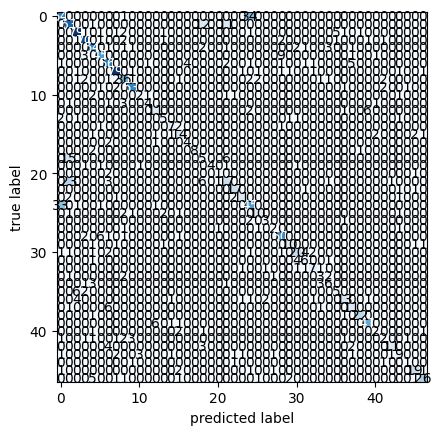

In [40]:
def plot_confusion_mat(cm):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(conf_mat=cm, ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(loo_confusion_matrix)

Melatih Model dan Melakukan Prediksi pada Data Uji

In [41]:
clf.fit(hog_features_train_scaled, y_train)
y_test_pred = clf.predict(hog_features_test_scaled)

Visualisasi Image dengan Fitur HOG


In [42]:
def plot_images_with_hog(x, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize = (15, 5))
    fig.suptitle(title)

    for i in range(min(len(x), 10)):
        axes[0, i].imshow(x[i].reshape((28, 28)), cmap = 'gray')
        axes[0, i].axis('off')

    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap = 'gray')
        axes[1, i].axis('off')

    plt.show()

 Ekstraksi Fitur HOG Image

In [43]:
def extract_hog_images(images):
    hog_images = []
    for image in images:
        _, hog_img = hog(image.reshape((28,28)), orientations = 9, pixels_per_cell = (8,8),
                         cells_per_block = (2,2), visualize = True, block_norm = 'L2')
        hog_images.append(hog_img)

    return np.array(hog_images)

Ekstraksi Fitur HOG dan Visualisasi Image

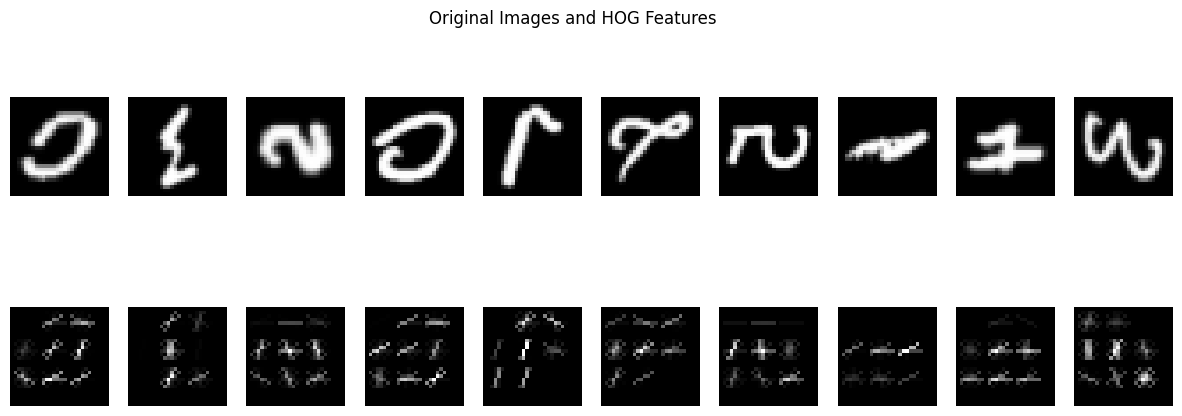

In [44]:
hog_images_test = extract_hog_images(x_test)
plot_images_with_hog(x_test, hog_images_test, title = "Original Images and HOG Features")